In [209]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Part 1

Consider the following grid world problem.

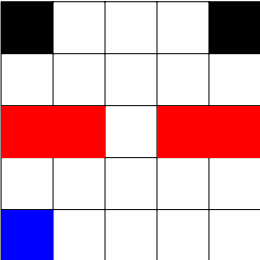

The agent starts at the blue square and moves to a neighbouring state with equal probability. If the agent moves to a red state, it receives a reward of −20 and goes back to the start, i.e., the blue square. A move between any two other states receives a reward of −1. A move that attempts to move outside of the grid receives a reward of −1. The black squares serve as a terminal states. Intuitively, you can see how the goal here is to pass through the opening in the red “wall” and get to one of the black squares and hence terminate the episode. Use the Sarsa and Q-learning algorithms to learn the optimal policy for this task. Plot a trajectory of an agent utlizing the policy learned by each of the methods. Are they different or similar? Why or why not? You may assume to use ϵ-greedy action selection for this task. How does the sum of rewards over an episode behaves for each of these two methods.

### SARSA

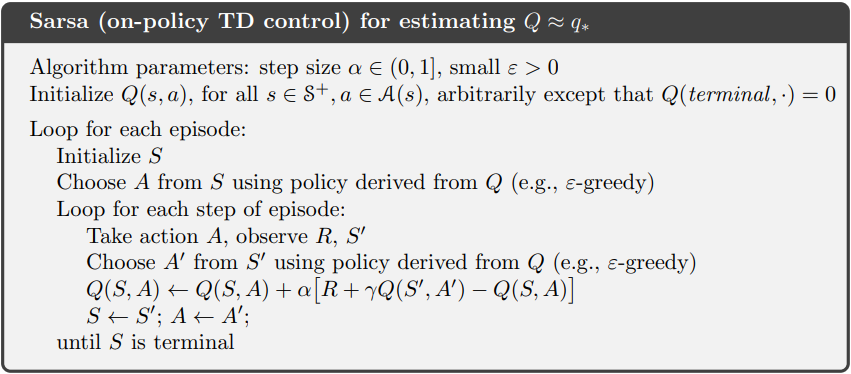

In [210]:
Grid_size = 5
Alpha = 0.1
Gamma = 0.95
step = [[-1,0],[1,0],[0,-1],[0,1]] #Up #Down #Left #Right
step_c = ["Up", "Down", "Left", "Right"]
Q_SARSA = np.zeros((Grid_size,Grid_size))

In [211]:
def Reward_And_Transition_Part_1(Current_Step, Action):
    if Current_Step == [0,0]:
        Next_Step = [0,0]
        Reward = 0
        return  Next_Step, Reward
    
    elif Current_Step == [0,4]:
        Next_Step = [0,4]
        Reward = 0
        return  Next_Step, Reward
    
    if Current_Step == [2,0] or Current_Step == [2,1] or Current_Step == [2,3] or Current_Step == [2,4]:
        Next_Step = [4,0]
        Reward = -20
        return  Next_Step, Reward

    Next_Step = [a + b for a, b in zip(Current_Step, Action)]
    Reward = -1
    
    if Next_Step[0] < 0 or Next_Step[0] > 4 or Next_Step[1] < 0 or Next_Step[1] > 4:
        Reward = -1
        return Current_Step, Reward
    
    return Next_Step, Reward

In [212]:
def Next_Action_EGreedy(Q, i,j,epsilon = 0.1):
    if random.uniform(0, 1) < epsilon:
        Random_number = random.randint(0,3)
        Action = step[Random_number]
    else:
        if i == 0:
            i = 1
        if i == 4:
            i = 3
        if j == 0:
            j = 1
        if j == 4:
            j = 3

        up = Q[i-1,j]
        down = Q[i+1,j]
        left = Q[i,j-1]
        right = Q[i,j+1]
        Max_Value = np.argmax([up,down,left,right])
        Action = step[Max_Value]
    return Action
    

In [213]:
def Plot_Policy(Q):
    Q = np.pad(Q, pad_width=1, mode='constant', constant_values=-100)

    matrix = [['' for _ in range(Grid_size)] for _ in range(Grid_size)]

    for i in range(1,Grid_size+1):
        for j in range(1,Grid_size+1):
            up = Q[i-1,j]
            down = Q[i+1,j]
            left = Q[i,j-1]
            right = Q[i,j+1]
            
            Max_Value = np.argmax([up,down,left,right])
            matrix[i-1][j-1] = step_c[Max_Value]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(Grid_size):
        for j in range(Grid_size):
            ax.text(j, i, matrix[i][j], va='center', ha='center')

    ax.set_xlim(-0.5, Grid_size - 0.5)
    ax.set_ylim(Grid_size - 0.5, -0.5)

    plt.show()
    

In [214]:
for i in range(1000):
    Current_Position = [4,0]
    while True:   

        Action = Next_Action_EGreedy(Q_SARSA,Current_Position[0], Current_Position[1], epsilon = 1)
        Next_Position, Reward = Reward_And_Transition_Part_1(Current_Position, Action)

        New_Action = Next_Action_EGreedy(Q_SARSA,Next_Position[0], Next_Position[1], epsilon = 1)
        Next_Position_F, Reward_ = Reward_And_Transition_Part_1(Next_Position, New_Action)



        Q_SARSA[Current_Position[0], Current_Position[1]] += Alpha * (Reward + ( Gamma * Q_SARSA[Next_Position_F[0], Next_Position_F[1]]) - Q_SARSA[Current_Position[0], Current_Position[1]]    )
        Current_Position = Next_Position_F

        if Reward == 0:
            break 

#### Trajectory 

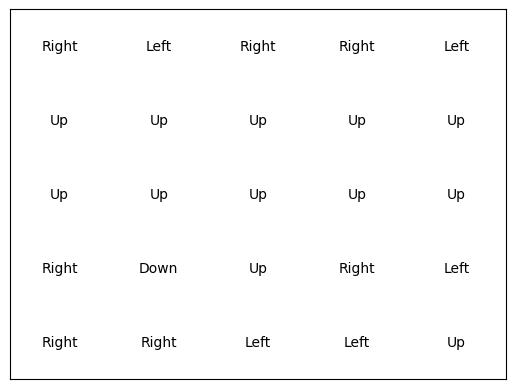

In [215]:
Plot_Policy(Q_SARSA) 

#### Matrix Value

In [216]:
np.round(Q_SARSA, decimals=3)

array([[  0.   , -12.781, -19.928, -11.793,   0.   ],
       [-21.521, -21.689, -37.317, -31.951, -19.475],
       [-62.4  , -63.448, -38.873, -62.418, -64.05 ],
       [-43.122, -42.214, -48.24 , -43.172, -45.108],
       [-43.862, -42.041, -42.138, -45.165, -44.578]])

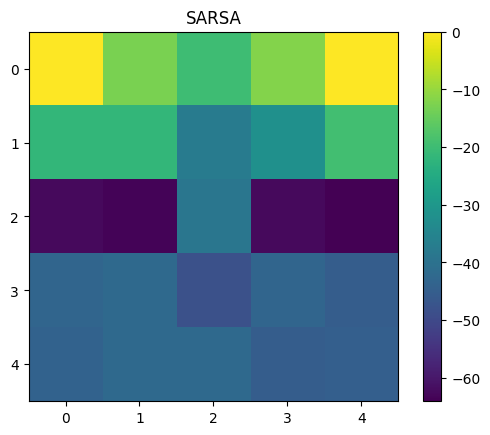

In [217]:
plt.imshow(Q_SARSA)
plt.colorbar()  # Show color scale
plt.title('SARSA')
plt.show()

### Q-Learning

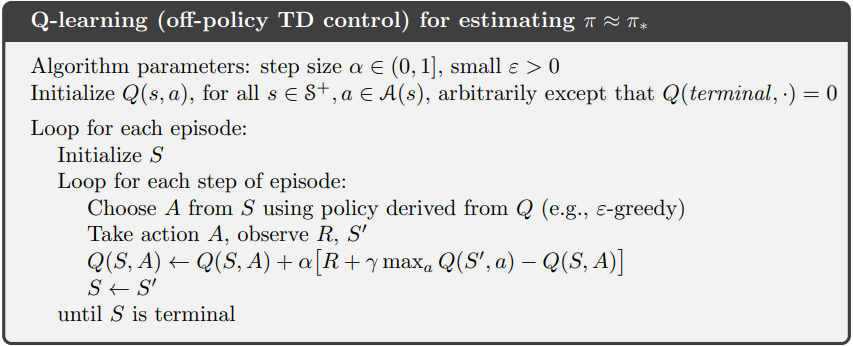

In [218]:
Q_Learning = np.zeros((5,5))

In [219]:
for i in range(10000):
    Current_Position = [4,0]
    while True:
        Action = Next_Action_EGreedy(Q_Learning, Current_Position[0], Current_Position[1], epsilon=0.2)
        Next_Position, Reward = Reward_And_Transition_Part_1(Current_Position, Action)
        Q_Learning[Current_Position[0], Current_Position[1]] += Alpha * (Reward + Gamma * (Q_Learning[Next_Position[0], Next_Position[1]] - Q_Learning[Current_Position[0], Current_Position[1]]) )        
        Current_Position = Next_Position
        if Reward == 0:
            break 

In [220]:
np.round(Q_Learning, decimals=3)

array([[  0.   , -18.834, -20.751, -18.84 ,   0.   ],
       [-20.643, -19.37 , -22.375, -25.278, -23.516],
       [-58.641, -59.068, -29.407, -58.687, -57.954],
       [-37.547, -38.137, -34.064, -38.029, -38.712],
       [-37.631, -36.683, -35.518, -36.691, -38.169]])

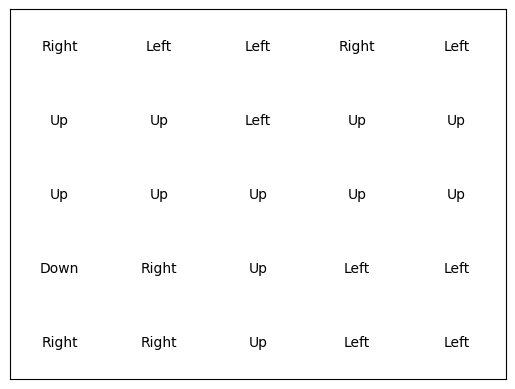

In [221]:
Plot_Policy(Q_Learning)

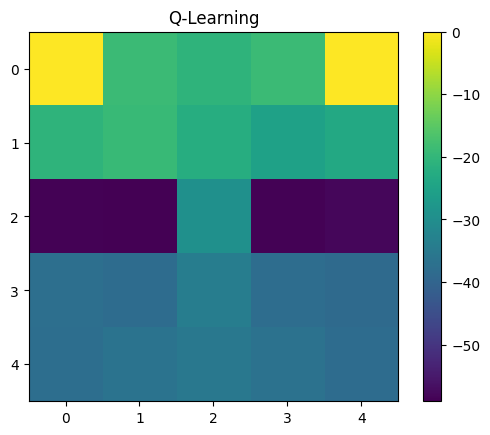

In [222]:
plt.imshow(Q_Learning)
plt.colorbar()  # Show color scale
plt.title('Q-Learning')
plt.show()

In Sarsa, this sum of rewards over episodes tends to be more variable because it relies on the on-policy nature of learning; its Q-values are updated according to what actions were actually done following whichever policy is in force. It entails a delayed convergence of the sum of rewards to a high level in the cases when an exploration phase by the agent can let it collect less Reward more consistently. In contrast, Q-learning usually gives a faster and more stable reward increase due to its off-policy nature. Since it looks at the optimum future rewards regardless of the current policy, it could more rapidly accumulate rewards to attain a very stable level of performance.

## Part 2

Consider a scenario where we have a random walk on a 7 × 7 grid. That is, we are equally likely to move up, down, left, or right. Suppose that we start the random walk at the precise center of the grid.

We assume that the lower left and upper right corners are terminal states, with, respectively, rewards of −1 and 1. Rewards for transitions between two states are 0, if an attempt to transition outside the wall is made, the agent stays in the same spot and receives a reward of 0. Compute the value function for this “random walk” policy using (1) gradient Monte Carlo method and (2) the semi-gradient TD(0) method with an affine function approximation. How does it compare to the exact value function?

### Gradient Monte Carlo

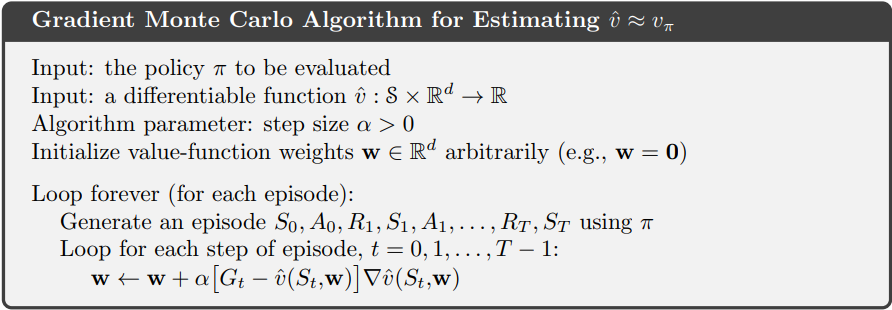

In [223]:
Grid_size_2 = 7
Alpha = 0.1
Gamma = 0.95
step = [[-1,0],[1,0],[0,-1],[0,1]] #Up #Down #Left #Right
step_c = ["Up", "Down", "Left", "Right"]
W_MC = np.zeros((Grid_size_2,Grid_size_2))

In [224]:
def Reward_And_Transition_Part_2(Current_Step, Action):

    if Current_Step == [6,0]:
        Next_Step = [6,0]
        Reward = -1
        return  Next_Step, Reward
    
    elif Current_Step == [0,6]:
        Next_Step = [0,6]
        Reward = 1
        return  Next_Step, Reward

    Next_Step = [a + b for a, b in zip(Current_Step, Action)]
    Reward = 0
    
    if Next_Step[0] < 0 or Next_Step[0] > (Grid_size_2 - 1) or Next_Step[1] < 0 or Next_Step[1] > (Grid_size_2 - 1):
        Reward = 0
        return Current_Step, Reward
    return Next_Step, Reward

In [225]:
def Update_Value(Reward_list, State_list):
    G = 0
    for i in range(len(Reward_list) -1, -1, -1):
        G = Reward_list[i] + Gamma  * G
        W_MC[State_list[i][0], State_list[i][1]] += Alpha * (G - W_MC[State_list[i][0], State_list[i][1]])

In [226]:
episodes = 10000
for i in range(episodes):
    Current_Position = [3,3]
    Reward_list = []
    State_list = []
    while True:
        
        Action = step[random.randint(0,3)]
        Next_Position, Reward = Reward_And_Transition_Part_2(Current_Position, Action)

        State_list.append(Current_Position)
        Reward_list.append(Reward)
        Update_Value(Reward_list, State_list)
                 
        Current_Position = Next_Position
        if Reward == 1 or Reward == -1:
            break 

In [227]:
np.round(W_MC, decimals = 3)

array([[-0.013, -0.031, -0.01 ,  0.237,  0.095,  0.136,  1.   ],
       [-0.025, -0.03 , -0.011,  0.202,  0.151,  0.2  ,  0.321],
       [-0.054, -0.06 , -0.003,  0.108,  0.141,  0.161,  0.221],
       [-0.112, -0.114, -0.009,  0.012,  0.012,  0.111,  0.04 ],
       [-0.159, -0.2  , -0.065,  0.042,  0.044,  0.183,  0.123],
       [-0.241, -0.046,  0.034,  0.088,  0.025,  0.036,  0.072],
       [-1.   , -0.339,  0.021,  0.106, -0.055, -0.023,  0.02 ]])

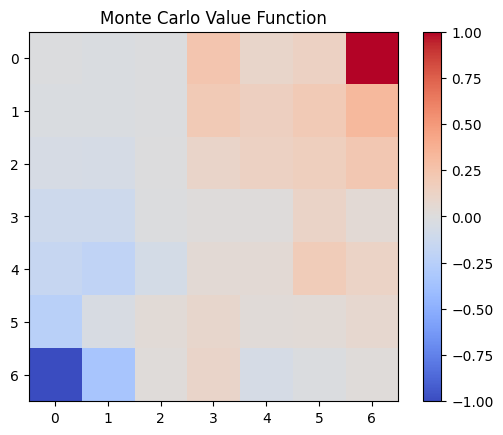

In [228]:
plt.imshow(W_MC, cmap='coolwarm')
plt.colorbar()  # Show color scale
plt.title('Monte Carlo Value Function')
plt.show()

### Semi-gradient TD

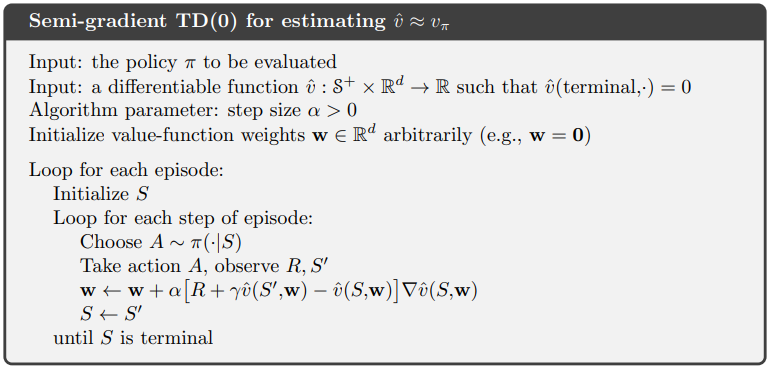

In [229]:
W_TD = np.zeros((Grid_size_2,Grid_size_2))
A = np.zeros((Grid_size_2**2,Grid_size_2**2))
b = np.zeros(Grid_size_2**2)

In [230]:
episodes = 1000
for i in range(episodes):
    Current_Position = [3,3]
    while True: 
        Phi = np.zeros(Grid_size_2**2)
        Phi_new = np.zeros(Grid_size_2**2)    

        
        Action = step[random.randint(0,3)]

        Next_Position, Reward = Reward_And_Transition_Part_2(Current_Position, Action)
        
        W_TD[Current_Position[0], Current_Position[1]] += Alpha * (Reward + (Gamma * W_TD[Next_Position[0], Next_Position[1]] - W_TD[Current_Position[0], Current_Position[1]]))
        
        Phi[Current_Position[0] * Grid_size_2 + Current_Position[1]] = 1
        Phi_new[Next_Position[0] * Grid_size_2 + Next_Position[1]] = 1

        A += np.outer(Phi, Phi - Gamma * Phi_new)
        b += Reward * Phi_new
        Current_Position = Next_Position
        if Reward == 1 or Reward == -1:
            break 

In [231]:
A

array([[1135.9 , -518.7 ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [-529.15, 1642.15, -530.1 , ...,    0.  ,    0.  ,    0.  ],
       [   0.  , -521.55, 1624.85, ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ..., 1653.  , -500.65,    0.  ],
       [   0.  ,    0.  ,    0.  , ..., -533.9 , 1689.45, -520.6 ],
       [   0.  ,    0.  ,    0.  , ...,    0.  , -520.6 , 1154.  ]])

In [232]:
b

array([   0.,    0.,    0.,    0.,    0.,    0.,  477.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0., -523.,    0.,    0.,
          0.,    0.,    0.,    0.])

In [233]:
W_t = np.round(np.linalg.inv(A + np.eye(Grid_size_2**2)).dot(b).reshape(7,7), decimals=3)

In [234]:
np.round(W_t, decimals=1)

array([[ -0.1,   0.2,   0.8,   2.1,   4.2,   8.6,  19.2],
       [ -0.4,  -0.1,   0.5,   1.5,   3.2,   5.7,   9. ],
       [ -1.1,  -0.7,  -0.1,   0.8,   1.9,   3.3,   4.4],
       [ -2.4,  -1.8,  -1. ,  -0.1,   0.8,   1.6,   2.2],
       [ -4.7,  -3.5,  -2.1,  -1. ,  -0.1,   0.6,   0.9],
       [ -9.4,  -6.2,  -3.6,  -1.9,  -0.8,  -0.1,   0.2],
       [-19.3,  -9.5,  -4.9,  -2.5,  -1.2,  -0.4,  -0.1]])

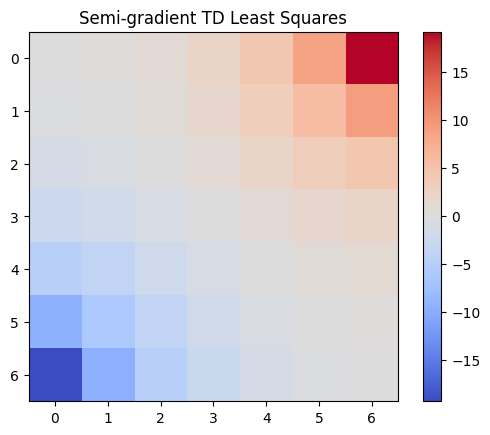

In [235]:
plt.imshow(W_t, cmap='coolwarm')
plt.colorbar()  # Show color scale
plt.title('Semi-gradient TD Least Squares')
plt.show()

In [236]:
np.round(W_TD, decimals=2)

array([[ -0.31,   0.11,   1.  ,   2.25,   4.6 ,   7.56,  18.17],
       [ -0.5 ,  -0.4 ,   0.1 ,   1.2 ,   2.79,   4.93,   9.63],
       [ -1.12,  -0.71,  -0.28,   0.62,   1.81,   3.55,   5.21],
       [ -2.08,  -1.55,  -0.89,  -0.1 ,   0.61,   1.67,   2.62],
       [ -5.55,  -3.33,  -2.18,  -0.79,   0.05,   0.82,   1.31],
       [-10.1 ,  -5.43,  -3.21,  -1.84,  -0.32,   0.19,   0.55],
       [-18.55,  -5.23,  -4.32,  -2.7 ,  -0.93,   0.06,   0.24]])

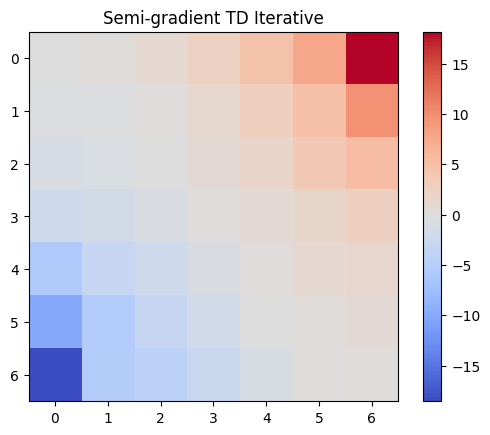

In [237]:
plt.imshow(W_TD, cmap='coolwarm')
plt.colorbar()  # Show color scale
plt.title('Semi-gradient TD Iterative')
plt.show()

The Gradient Monte Carlo method arrives at the value function by averaging returns from several episodes to converge very slowly to the actual value function over many episodes. An interesting aspect is that cells are more affected by their neighbors. SemiGradient TD(0) applies one-step temporal difference learning with function approximation. At the same time, its convergence may be faster than Monte Carlo; it depends on the choice of features and the learning rate.